In [193]:
import random
class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = " POSITIVE"
    


class Review:
    def __init__(self,text,score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()

    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else:#score 4 or 5
            return Sentiment.POSITIVE
class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
    def get_text(self):
        return [x.text for x in self.reviews]
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]

    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE , self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE , self.reviews))
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
 
        
        

**LOAD DATA**

In [194]:
import json
file_name='D:/Data Science/Books_small_10000.json'
reviews=[]
with open(file_name) as f:
    for line in f:
        review =json.loads(line)
        reviews.append(Review(review['reviewText'],review['overall']))
reviews[1].sentiment


'NEUTRAL'

__PREPARE DATA__

In [195]:
len(reviews)

10000

In [196]:
from sklearn.model_selection import train_test_split
training , test = train_test_split(reviews,test_size=0.33,random_state=42)
train_container = ReviewContainer(training)
test_container = ReviewContainer(test)
len(cont.reviews)

872

In [197]:
train_container.evenly_distribute()
train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()

test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))
print(train_y.count(Sentiment.NEGATIVE))

436
436


**BAG OF WORD VECTORIZATION**

In [254]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
#This book is great !
#This book was so bad
vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors  =vectorizer.transform(test_x)
print(train_x[0])
print(train_x_vectors[0].toarray())



I will be honest, and tell you that right off the bat, I did not purchase this book, but I looked inside of it on Amazon preview. I wanted to leave a comment on 2 very significant errors that I noticed right off the bat. The first is with the biscuit recipe on page 15. It calls for 2 cups of flour, 1 cup of heavy cream, and  cup of buttermilk. I make biscuits all the time, both with cream and buttermilk- I can say that the ratio of liquid to flour is incorrect. At the most you would use -1 cup of liquid for 2 cups of flour. This biscuit recipe is incorrect and will yield a liquid doughy mess. The second mistake I noticed was in the grits/egg casserole on page 23. They use 1 cup of quick grits, with 2 cups of water and 2 cups of milk. Again the liquids to grits ratio is inaccurate (4 &#62; 1). Those will be the soupiest grits ever. The recipes need some serious editing. I would not purchase or recommend it based on the inaccuracy of the recipes in the preview alone.
[[0. 0. 0. ... 0. 0.

__CLASSIFICATION__

#### Linear SVM

In [223]:
from sklearn import svm
clf_svm = svm.SVC(kernel='linear')
clf_svm.fit(train_x_vectors,train_y)

test_x[0]

clf_svm.predict(test_x_vectors[0])



array([' POSITIVE'], dtype='<U9')

#### Decision Tree

In [224]:
from sklearn.tree import DecisionTreeClassifier
clf_dec= DecisionTreeClassifier( )
clf_dec.fit(train_x_vectors,train_y)

clf_dec.predict(test_x_vectors[0])


array(['NEGATIVE'], dtype='<U9')

 #### Naive Bayes

In [225]:
from sklearn.naive_bayes import MultinomialNB

clf_nb = MultinomialNB()
clf_nb.fit(train_x_vectors, train_y)

# Predict directly without converting to dense
prediction = clf_nb.predict(test_x_vectors[0])
print(prediction)


[' POSITIVE']


#### Logistic Regression

In [226]:
from sklearn.linear_model import LogisticRegression
clf_log =  LogisticRegression()
clf_log=LogisticRegression()
clf_log.fit(train_x_vectors,train_y)
clf_log.predict(test_x_vectors[0])

array([' POSITIVE'], dtype='<U9')

**Evaluation**

In [227]:
#Mean Accuracy
print("SVM =",clf_svm.score(test_x_vectors,test_y))
print("Decition Tree =" ,clf_dec.score(test_x_vectors,test_y))
print("Naive Bayse =" ,clf_nb.score(test_x_vectors,test_y))
print("Logic Regression =", clf_log.score(test_x_vectors,test_y))

SVM = 0.8076923076923077
Decition Tree = 0.6274038461538461
Naive Bayse = 0.8125
Logic Regression = 0.8028846153846154


In [228]:
#f1 scores
from sklearn.metrics import f1_score
f1_score(test_y, clf_svm.predict(test_x_vectors),average=None , labels=[ Sentiment.POSITIVE,Sentiment.NEUTRAL,Sentiment.NEGATIVE])
#f1_score(test_y, clf_dec.predict(test_x_vectors),average=None , labels=[ Sentiment.POSITIVE,Sentiment.NEUTRAL,Sentiment.NEGATIVE])
#f1_score(test_y, clf_nb.predict(test_x_vectors),average=None , labels=[ Sentiment.POSITIVE,Sentiment.NEUTRAL,Sentiment.NEGATIVE])
#f1_score(test_y, clf_log.predict(test_x_vectors),average=None , labels=[ Sentiment.POSITIVE,Sentiment.NEUTRAL,Sentiment.NEGATIVE])


D:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([0.80582524, 0.        , 0.80952381])

In [212]:
test_set = ['wow , 5 stars',"bad book do not buy",'horrible waste of time ']
new_test = vectorizer.transform(test_set)
clf_svm.predict(new_test)

array([' POSITIVE', 'NEGATIVE', 'NEGATIVE'], dtype='<U9')

**Tuning our model(with grid search)**

In [238]:
from sklearn.model_selection import GridSearchCV
parameters = {'kernel' : ('linear','rbf'),'C':(1,4,8,16,32)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors,train_y)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [239]:
print("SVM =",clf_svm.score(test_x_vectors,test_y))

SVM = 0.8076923076923077


**Saving model**

In [241]:
import pickle
with open('D:/Data Science/sentiment_classifier.pkl','wb') as f:
          pickle.dump(clf, f)

**Load Model**

In [242]:
with open('D:/Data Science/sentiment_classifier.pkl','rb') as f:
    loaded_clf = pickle.load(f)

In [245]:
print(test_x[0])
loaded_clf.predict(test_x_vectors[0])

I will admit, at first I was put off by the disagreeable main character of Ms. Lederman's story, Edna. I wasn't sure how this book and I would get along. Would I arrive at a sour teenager who redeems herself or not allow myself to get there; frustrated and closing the book, unable to take her unpleasantries, along with her grouchy grandparents for another page?Edna made me roll my eyes and for a brief moment I wanted her to die out there in that desert. Ms. Lederman writes her so well. Edna was me as a teenager, the girl I want to go back and smack from here to next Sunday. Then, with the introduction of a gentle local boy, I became lost in the story. A little romance will do that to me, you know. Finally I wanted to see the change in Edna, I wanted to hear grandpa speak, and most of all, I wanted to keep my book open.Ms. Lederman's characters are deep and set among the beautiful backdrop of a simple desert life. Her writing is solid, with admirable character and plot growth. This is t

array([' POSITIVE'], dtype='<U9')

**Confusion Matrix**

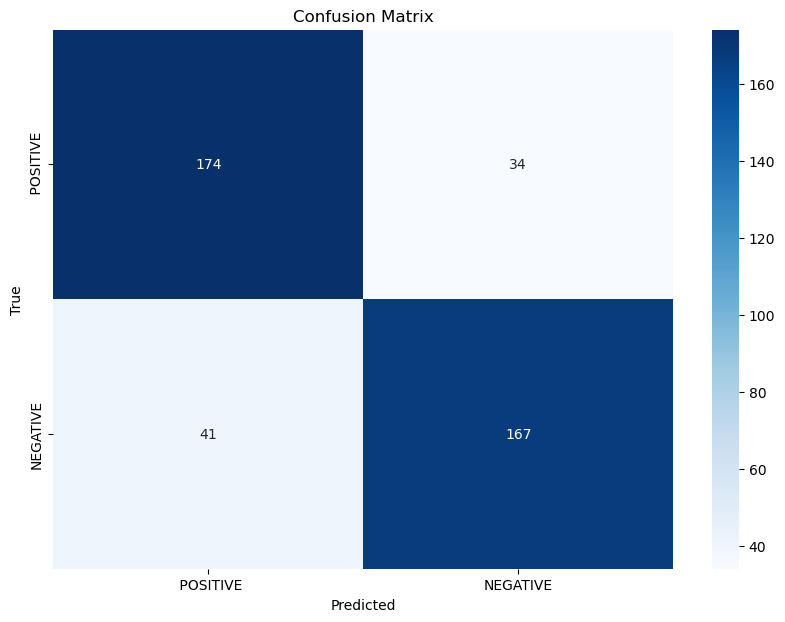

In [256]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_encoded = clf.predict(test_x_vectors)

# Decode the predictions back to original labels
y_pred = encoder.inverse_transform(y_pred_encoded)
test_y_decoded = encoder.inverse_transform(test_y_encoded)

# Generate confusion matrix
cm = confusion_matrix(test_y_decoded, y_pred, labels=encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
